In [1]:
#Import Library dan modul
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import string
import csv
from google.colab import drive
from tensorflow.keras.layers import Embedding, LSTM, Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import TextVectorization
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
#Load drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Membaca 5 data teratas data train
train_path = '/content/drive/My Drive/dataset/PMB UBE/Data Train.csv'
train_df = pd.read_csv(train_path)
train_df.head()

,No,Topik,Respon,Freetext,Intent,Sample text 1,Sample text 2,Sample text 3,Sample text 4,Sample text 5,...,Sample text 539,Sample text 540,Sample text 541,Sample text 542,Sample text 543,Sample text 544,Sample text 545,Sample text 546,Sample text 547,Sample text 548
0,1,Info Program Studi,Universitas BotEdu (UBE) menawarkan berbagai p...,NaN,usr.info_program_studi,boleh kasih tahu soal program studi yang ada d...,prodi yang ada di univ botedu?,kak boleh dibantu prodi yang ada di universita...,saya ingin mendapaftar di universitas BotEdu t...,informasi soal program studi di universitas bo...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Info Jadwal Pendaftaran,Pendaftaran mahasiswa baru Universitas BotEdu ...,NaN,usr.info_jadwal_pendaftaran,info soal pendaftaran di UBE,mau tahu dong di UBE buka pendaftarannya kapan,tahu ga kamu soal pendaftaran di universiras b...,kapan nih botedu buka pendaftaran?,kasih tahu aku soal jadwal pendaftaran univers...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Syarat Pendaftaran,"Untuk mendaftar di Universitas BotEdu, Anda pe...",NaN,usr.syarat_pendaftaran,syarat yang dibutuhkan untuk mendaftar di univ...,perlu apa untuk daftar di universitas botedu,dokumen untuk daftar di universitas botedu apa...,tahu ga soal universitas botedu syarat masukny...,rincikan soal berkas pendaftaran universitas b...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Info Biaya Kuliah,Biaya kuliah di Universitas BotEdu tergantung ...,NaN,usr.info_biaya_kuliah,seputar biaya kuliah di universitas botedu,di universitas botedu biaya yang dikeluarkan b...,mau tahu dong untuk biaya kuliah di universita...,bisa dibantu soal biaya perkuliahan di univers...,detail biaya kuliah di universitas botedu,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Cara Daftar,"Untuk mendaftar di Universitas BotEdu, ikuti l...",NaN,usr.cara_daftar,instruksi pendaftaran di UBE,boleh kasih cara untuk proses pendaftaran di u...,bagaimana cara melakukan pendaftaran di univer...,"bagi yang berniat mendaftar di botedu, maka ca...",bagaimana proses pendaftaran di botedu,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#Membaca 5 data teratas data test
test_path = '/content/drive/My Drive/dataset/PMB UBE/Data Test.csv'
test_df = pd.read_csv(test_path)
test_df.head()

,No,Sample Test,Intent
0,1,pengen tau prodi yang ada di universitas boted...,usr.info_program_studi
1,2,pendaftaran maba botedu dibuka kapan,usr.info_jadwal_pendaftaran
2,3,perlu apa aja deh kalau minat daftar di botedu?,usr.syarat_pendaftaran
3,4,buat yang berminat kuliah di botedu perlu siap...,usr.info_biaya_kuliah
4,5,"belum paham tata cara daftarnya nih, kasih inf...",usr.cara_daftar


In [5]:
#Cek missing value data train
train_df.isnull().sum()

,0
No,0
Topik,0
Respon,0
Freetext,12
Intent,0
...,...
Sample text 544,12
Sample text 545,12
Sample text 546,12
Sample text 547,12


In [6]:
#Hapus nilai NaN data train
train_df = train_df.dropna(axis=1)
train_df

,No,Topik,Respon,Intent,Sample text 1,Sample text 2,Sample text 3,Sample text 4,Sample text 5,Sample text 6,...,Sample text 71,Sample text 72,Sample text 73,Sample text 74,Sample text 75,Sample text 76,Sample text 77,Sample text 78,Sample text 79,Sample text 80
0,1,Info Program Studi,Universitas BotEdu (UBE) menawarkan berbagai p...,usr.info_program_studi,boleh kasih tahu soal program studi yang ada d...,prodi yang ada di univ botedu?,kak boleh dibantu prodi yang ada di universita...,saya ingin mendapaftar di universitas BotEdu t...,informasi soal program studi di universitas bo...,rincikan soal program studi yang tersedia di u...,...,jurusan yang tersedia di UBE tuh apa aja ya?,"mau nanya, ada prodi apa aja ya kalo di UBE itu?","di UBE terdapat jurusan apa ya, penasaran nih",macam-macam program studi yang ditawarkan UBE,program studi yang dimiliki UBE,jurusannya ada apa aja sih,prodi yang ada di ube apa aja ya kak?,daftar jurusan yang ada di ube bisa dilihat di...,"mau nanya nih kak, program studi yang ada di u...","mau tau dong, di ube punya jurusan apa aja?"
1,2,Info Jadwal Pendaftaran,Pendaftaran mahasiswa baru Universitas BotEdu ...,usr.info_jadwal_pendaftaran,info soal pendaftaran di UBE,mau tahu dong di UBE buka pendaftarannya kapan,tahu ga kamu soal pendaftaran di universiras b...,kapan nih botedu buka pendaftaran?,kasih tahu aku soal jadwal pendaftaran univers...,universitas botedu biasanya buka pendaftaran t...,...,sekarang udah bisa daftar belum ya?,batas waktu pendaftaran UBE,mau liat jadwal pendaftarannya dong,UBE buka pendaftaran sampai tanggal berapa?,lagi cari info jadwal pendaftaran mahasiswa baru,pendaftaran maba ube tgl brp ya?,pendaftaran untuk maba masih dibuka ngga sekar...,registrasi buat maba ube dibuka sampai kpn?,sampe tgl brp sih pendaftarannya,"mau nanya dong, pendaftaran untuk maba ube itu..."
2,3,Syarat Pendaftaran,"Untuk mendaftar di Universitas BotEdu, Anda pe...",usr.syarat_pendaftaran,syarat yang dibutuhkan untuk mendaftar di univ...,perlu apa untuk daftar di universitas botedu,dokumen untuk daftar di universitas botedu apa...,tahu ga soal universitas botedu syarat masukny...,rincikan soal berkas pendaftaran universitas b...,apa saja syarat mendaftarkan diri di UBE,...,ada info lengkap soal syarat pendaftaran maba ...,buat pendaftaran berkas apa saja yang dibutuhkan,bagaimana terkait syarat pendaftarannya?,untuk pendaftarannya tuh membutuhkan dokumen a...,"tertarik daftar, btw syaratnya apa aja ya? bis...",perlu nyiapin apa aja ya buat pendaftarannya,berkas yang dibutuhkan untuk pendaftaran apa?,"kak, kalo mau daftar di ube perlu dokumen apa ...",sebutkan persayaratan pendaftarannya,informasi mengenai syarat pendaftaran
3,4,Info Biaya Kuliah,Biaya kuliah di Universitas BotEdu tergantung ...,usr.info_biaya_kuliah,seputar biaya kuliah di universitas botedu,di universitas botedu biaya yang dikeluarkan b...,mau tahu dong untuk biaya kuliah di universita...,bisa dibantu soal biaya perkuliahan di univers...,detail biaya kuliah di universitas botedu,sediakan informasi soal biaya yang dikeluarkan...,...,"penasaran deh sama biaya kuliahnya, boleh kasi...",semesteran di UBE tuh bayarnya kisaran berapa ...,total biaya perkuliahan di UBE,buat kuliah di UBE biaya nya nyampe sekitaran ...,"btw, biaya kuliah UBE tuh sekitar berapa juta ...",mau liat daftar biaya kuliah di ube dong,daftar biaya semesteran di ube bisa dilihat di...,brp biaya kuliah tiap semesternya,biaya semesteran di ube nyampe berapa sih?,"aku pengen tau, buat kuliah di ube itu biayany..."
4,5,Cara Daftar,"Untuk mendaftar di Universitas BotEdu, ikuti l...",usr.cara_daftar,instruksi pendaftaran di UBE,boleh kasih cara untuk proses pendaftaran di u...,bagaimana cara melakukan pendaftaran di univer...,"bagi yang berniat mendaftar di botedu, maka ca...",bagaimana proses pendaftaran di botedu,langkah-langkah untuk mendaftar di universitas...,...,beritahu aku cara daftar kuliah di UBE,aku butuh panduan untuk daftar kuliah di UBE,mau daftar tapi bi

In [7]:
#Reshape data train
rows = []
for _, row in train_df.iterrows():
    for col in [col for col in train_df.columns if col.startswith("Sample text")]:
        rows.append({
            'Intent': row['Intent'],
            'Sample text': row[col]
        })

reshaped_train = pd.DataFrame(rows)
reshaped_train

,Intent,Sample text
0,usr.info_program_studi,boleh kasih tahu soal program studi yang ada d...
1,usr.info_program_studi,prodi yang ada di univ botedu?
2,usr.info_program_studi,kak boleh dibantu prodi yang ada di universita...
3,usr.info_program_studi,saya ingin mendapaftar di universitas BotEdu t...
4,usr.info_program_studi,informasi soal program studi di universitas bo...
...,...,...
955,usr.penutup,"tidak ada kak, sudah paham"
956,usr.penutup,"belum ada pertanyaan lain, makasih min"
957,usr.penutup,"belum ada kak, sementara sudah cukup"
958,usr.penutup,"tidak kak, thanks infonya"


In [8]:
#Reshape data test
reshaped_test = test_df[['Intent', 'Sample Test']]
reshaped_test

,Intent,Sample Test
0,usr.info_program_studi,pengen tau prodi yang ada di universitas boted...
1,usr.info_jadwal_pendaftaran,pendaftaran maba botedu dibuka kapan
2,usr.syarat_pendaftaran,perlu apa aja deh kalau minat daftar di botedu?
3,usr.info_biaya_kuliah,buat yang berminat kuliah di botedu perlu siap...
4,usr.cara_daftar,"belum paham tata cara daftarnya nih, kasih inf..."
...,...,...
105,usr.penutup,"cukup jelas kak, ga ada yg mau ditanyain lagi"
106,usr.penutup,"makasih infonya min, belum ada pertanyaan lagi"
107,usr.penutup,tidak ada yang ditanyain lagi kak
108,usr.penutup,"ga kak, makasih ya infonya"


###Preprocessing

In [11]:
def load_slangwords(file_path):
    slangwords = {}
    with open(file_path, mode='r', encoding='utf-8', newline='') as file:
        reader = csv.reader(file)
        for row in reader:
            if len(row) >= 2:
                slang = row[0].strip()
                correct = row[1].strip()
                slangwords[slang] = correct
    return slangwords

slangwords_file = '/content/drive/My Drive/dataset/PMB UBE/Slangword-indonesian.csv'

slangwords_dict = load_slangwords(slangwords_file)

slang_dict = {
    "mhs": "mahasiswa",
    "maba": "mahasiswa baru",
    "pkkmb": "pengenalan kehidupan kampus bagi mahasiswa baru"
}

#Menggabungkan slangwords dari file CSV dengan slang_dict
slangwords_dict.update(slang_dict)

#Fungsi untuk memperbaiki kata slang dalam teks
def fix_slangwords(text):
    words = text.split()
    fixed_words = [slangwords_dict[word.lower()] if word.lower() in slangwords_dict else word for word in words]
    return ' '.join(fixed_words)

#Fungsi preprocessing untuk teks
def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = fix_slangwords(text)
    return text

In [12]:
#Menerapkan preprocessing ke sample text data train
X_train = reshaped_train['Sample text'].apply(preprocess_text)
X_train

,Sample text
0,boleh kasih tahu soal program studi yang ada d...
1,prodi yang ada di universitas botedu
2,kak boleh dibantu prodi yang ada di universita...
3,saya ingin mendapaftar di universitas botedu t...
4,informasi soal program studi di universitas bo...
...,...
955,tidak ada kak sudah paham
956,belum ada pertanyaan lain terima kasih min
957,belum ada kak sementara sudah cukup
958,tidak kak thanks infonya


In [13]:
#Menerapkan preprocessing ke sample test data test
X_test = reshaped_test['Sample Test'].apply(preprocess_text)
X_test

,Sample Test
0,pengin tau prodi yang ada di universitas boted...
1,pendaftaran mahasiswa baru botedu dibuka kapan
2,perlu apa saja deh kalau minat daftar di botedu
3,buat yang berminat kuliah di botedu perlu siap...
4,belum paham tata cara daftarnya nih kasih info...
...,...
105,cukup jelas kak enggak ada yang mau ditanyain ...
106,terima kasih infonya min belum ada pertanyaan ...
107,tidak ada yang ditanyain lagi kak
108,enggak kak terima kasih ya infonya


In [14]:
y_train = reshaped_train['Intent']
y_train

,Intent
0,usr.info_program_studi
1,usr.info_program_studi
2,usr.info_program_studi
3,usr.info_program_studi
4,usr.info_program_studi
...,...
955,usr.penutup
956,usr.penutup
957,usr.penutup
958,usr.penutup


In [15]:
y_train.unique()

array(['usr.info_program_studi', 'usr.info_jadwal_pendaftaran',
       'usr.syarat_pendaftaran', 'usr.info_biaya_kuliah',
       'usr.cara_daftar', 'usr.layanan_bantuan', 'usr.proses_seleksi',
       'usr.persiapan_tes_seleksi', 'usr.seleksi_hasil',
       'usr.daftar_ulang', 'usr.masa_orientasi', 'usr.penutup'],
      dtype=object)

In [16]:
le = LabelEncoder()
y_train = le.fit_transform(reshaped_train['Intent'])

In [17]:
y_train

array([ 4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 11, 11, 11, 11

In [18]:
y_test = le.transform(reshaped_test['Intent'])
y_test

array([ 4,  3, 11,  2,  0,  5,  9,  8, 10,  1,  6,  4,  3, 11,  2,  0,  5,
        9,  8, 10,  1,  6,  3,  4,  3, 11,  2,  0,  5,  9,  8, 10,  1,  6,
        4,  3, 11,  2,  0,  5,  9,  8, 10,  1,  6,  2,  4,  3, 11,  2,  0,
        5,  9,  8, 10,  1,  6,  4,  3, 11,  2,  0,  5,  9,  8, 10,  1,  6,
        4,  3, 11,  2,  0,  5,  9,  8, 10,  1,  6,  4,  3, 11,  2,  0,  5,
        9,  8, 10,  1,  6,  4,  3, 11,  2,  0,  5,  9,  8, 10,  1,  6,  7,
        7,  7,  7,  7,  7,  7,  7,  7])

In [19]:
#Analisis teks
all_vocab = []
length = []

for idx, row in reshaped_train.iterrows():
    sent = row['Sample text']
    [all_vocab.append(i) for i in sent.split()]
    length.append(len(sent.split()))

max_vocab_length = len(set(all_vocab))
max_length = max(length)

In [20]:
#Menghitung jumlah kata unique dalam data train
max_vocab_length

628

In [21]:
#Menghitung jumlah kata terpanjang dalam kalimat pada data train
max(length)

17

In [22]:
text_vectorization = TextVectorization(max_tokens=max_vocab_length,
                                       standardize=None,
                                       split='whitespace',
                                       output_mode='int',
                                       output_sequence_length=max_length)

text_vectorization.adapt(X_train)

Digunakan untuk mengubah data sample text kedalam bentuk numerik dengan beberapa ketentuan:
- Hanya kata yang paling sering muncul hingga max_vocab_length yang akan dimasukkan ke dalam kosakata. Kata-kata lain akan diganti dengan token khusus <OOV> (out of vocabulary).
- Teks diproses secara konsisten, tanpa perbedaan karena huruf kapital atau tanda baca.
- Teks dipisahkan berdasarkan spasi.
- Mengubah token (kata) menjadi angka indeks dalam kosakata.
- Jika teks lebih pendek dari max_length, maka akan di-padding dengan nilai nol di akhir.
- Jika teks lebih panjang, maka akan di-truncate (dipotong) agar panjangnya sama dengan max_length.

In [23]:
text_vectorization.get_vocabulary()

['',
 '[UNK]',
 'di',
 'apa',
 'ube',
 'seleksi',
 'ada',
 'daftar',
 'botedu',
 'yang',
 'bagaimana',
 'pendaftaran',
 'untuk',
 'tes',
 'ya',
 'saja',
 'mahasiswa',
 'kak',
 'baru',
 'bisa',
 'enggak',
 'universitas',
 'ulang',
 'kapan',
 'hasil',
 'biaya',
 'mau',
 'cara',
 'proses',
 'berapa',
 'sih',
 'buat',
 'masa',
 'aku',
 'kasih',
 'orientasi',
 'sudah',
 'harus',
 'dong',
 'kuliah',
 'tau',
 'seleksinya',
 'nih',
 'syarat',
 'pendaftarannya',
 'info',
 'tuh',
 'program',
 'studi',
 'perlu',
 'tahu',
 'kalo',
 'soal',
 'prodi',
 'masuk',
 'belum',
 'melakukan',
 'min',
 'saya',
 'lagi',
 'itu',
 'informasi',
 'bantuan',
 'jadwal',
 'dimana',
 'cukup',
 'kuliahnya',
 'tolong',
 'pengin',
 'nya',
 'daftarnya',
 'caranya',
 'buka',
 'tanggal',
 'terkait',
 'dibantu',
 'login',
 'lihat',
 'boleh',
 'seperti',
 'kalau',
 'dilihat',
 'deh',
 'cek',
 'butuh',
 'apakah',
 'tidak',
 'terima',
 'persyaratan',
 'jelaskan',
 'infonya',
 'dokumen',
 'persiapan',
 'bagi',
 'akun',
 'tata',

In [24]:
#Konvert data ke numerik
X_train_seq = text_vectorization(X_train)
X_test_seq = text_vectorization(X_test)

###Modelling

In [33]:
input_text = Input(shape=(max_length,))
x = Embedding(input_dim=max_vocab_length, output_dim=128, input_length=max_length)(input_text)
x = LSTM(128, return_sequences=True)(x)
x = Dropout(0.5)(x)
x = LSTM(64, return_sequences=False)(x)
x = Dropout(0.5)(x)
x = Dense(32, activation="relu")(x)
x = Dense(len(le.classes_), activation='softmax')(x)

model = Model(inputs=input_text, outputs=x)

#Compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [34]:
#Arsitektur model
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 17)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding_3 (Embedding)              │ (None, 17, 128)             │          80,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ (None, 17, 128)             │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 17, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 12)                  │             396 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 263,852 (1.01 MB)

 Trainable params: 263,852 (1.01 MB)

 Non-trainable params: 0 (0.00 B)

In [35]:
#Train model
history = model.fit(
    X_train_seq, y_train,
    epochs=20, batch_size=32,
    validation_data=(X_test_seq, y_test),
    callbacks=[early_stopping]
)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.0860 - loss: 2.4865 - val_accuracy: 0.1182 - val_loss: 2.4782
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.1474 - loss: 2.4371 - val_accuracy: 0.2909 - val_loss: 2.0201
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3628 - loss: 1.8601 - val_accuracy: 0.4455 - val_loss: 1.4638
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5275 - loss: 1.3349 - val_accuracy: 0.6636 - val_loss: 1.1066
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6948 - loss: 0.9592 - val_accuracy: 0.6818 - val_loss: 0.9412
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8057 - loss: 0.6287 - val_accuracy: 0.8273 - val_loss: 0.6349
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9067 - loss: 0.3954 - val_accuracy: 0.8818 - val_loss: 0.5185
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9564 - loss: 0.2373 - val_accuracy: 0.8273 - val_lo

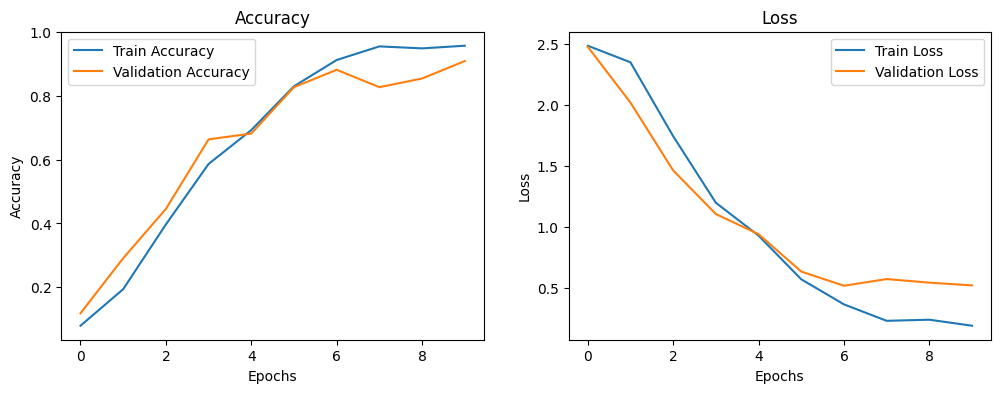

In [36]:
plt.figure(figsize=(12, 4))

#Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

#Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

###Evaluate

In [37]:
#Evaluasi pada data train
y_train_pred = model.predict(X_train_seq)  # Prediksi pada data train
y_train_pred_class =  np.argmax(y_train_pred, axis=1)
# y_train_true = np.argmax(y_train, axis=1)  # Mengambil kelas dengan probabilitas tertinggi

train_accuracy = accuracy_score(y_train, y_train_pred_class)
print(f'Train Accuracy: {train_accuracy}')

train_classification_report = classification_report(y_train, y_train_pred_class, target_names=le.classes_)
print(f'Train Classification Report:\n{train_classification_report}')


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Train Accuracy: 0.9791666666666666
Train Classification Report:
                             precision    recall  f1-score   support

            usr.cara_daftar       0.94      1.00      0.97        80
           usr.daftar_ulang       1.00      1.00      1.00        80
      usr.info_biaya_kuliah       0.99      1.00      0.99        80
usr.info_jadwal_pendaftaran       1.00      0.81      0.90        80
     usr.info_program_studi       1.00      0.96      0.98        80
        usr.layanan_bantuan       1.00      1.00      1.00        80
         usr.masa_orientasi       0.91      1.00      0.95        80
                usr.penutup       1.00      1.00      1.00        80
  usr.persiapan_tes_seleksi       1.00      1.00      1.00        80
         usr.proses_seleksi       1.00      0.97      0.99        80
          usr.seleksi_hasil       0.99      1.00      0.99        80
     usr.syarat_pendaftaran       0.94      1.00      0.97        80

In [38]:
#Evaluasi pada data test
y_test_pred = model.predict(X_test_seq)  # Prediksi pada data test
y_test_pred_class = y_test_pred.argmax(axis=1)
# y_test_true = np.argmax(y_test, axis=1)

test_accuracy = accuracy_score(y_test, y_test_pred_class)
print(f'Test Accuracy: {test_accuracy}')

test_classification_report = classification_report(y_test, y_test_pred_class, target_names=le.classes_)
print(f'Test Classification Report:\n{test_classification_report}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Test Accuracy: 0.8818181818181818
Test Classification Report:
                             precision    recall  f1-score   support

            usr.cara_daftar       0.70      0.78      0.74         9
           usr.daftar_ulang       0.88      0.78      0.82         9
      usr.info_biaya_kuliah       1.00      1.00      1.00        10
usr.info_jadwal_pendaftaran       0.82      0.90      0.86        10
     usr.info_program_studi       1.00      0.89      0.94         9
        usr.layanan_bantuan       1.00      0.67      0.80         9
         usr.masa_orientasi       0.89      0.89      0.89         9
                usr.penutup       0.90      1.00      0.95         9
  usr.persiapan_tes_seleksi       1.00      1.00      1.00         9
         usr.proses_seleksi       0.89      0.89      0.89         9
          usr.seleksi_hasil       0.89      0.89      0.89         9
     usr.syarat_pendaftaran       0.73      0.89      0.80         9

 

###Predict

In [39]:
#Mapping intent ke respon
intent_response_mapping = dict(zip(train_df['Intent'], train_df['Respon']))

#Fungsi untuk melakukan prediksi
def predict_intent_and_response(user_input):
    processed_input = preprocess_text(user_input)
    input_seq = text_vectorization([processed_input])
    prediction = model.predict(input_seq)
    predicted_class_index = np.argmax(prediction)
    predicted_intent = le.inverse_transform([predicted_class_index])[0]
    response = intent_response_mapping.get(predicted_intent)

    print(f'Intent: {predicted_intent}')
    print(f'Response: {response}')

    return predicted_intent, response

user_input = input("Sample text: ")
predicted_intent, predicted_response = predict_intent_and_response(user_input)

Sample text: ukt di ube per semesternya berapa?
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Intent: usr.info_biaya_kuliah
Response: Biaya kuliah di Universitas BotEdu tergantung pada program studi yang Anda pilih. Sebagai contoh, untuk Program Studi Teknik Informatika, biaya per semesternya mulai dari Rp 5.000.000. Anda juga dapat mengajukan beasiswa untuk meringankan biaya. Untuk detail lengkap, silakan kunjungi menu Biaya Kuliah pada website BotEdu. 

Apakah ada hal lain yang ingin Anda tanyakan?


In [40]:
model.save("model_pmb_lstm.h5")

In [41]:
import pickle
#Simpan LabelEncoder
with open("label_encoder.pkl", "wb") as f:
    pickle.dump(le, f)

#Simpan TextVectorization layer
with open("text_vectorization.pkl", "wb") as f:
    pickle.dump(text_vectorization, f)

In [42]:
import joblib

#Load model H5
model = tf.keras.models.load_model("model_pmb_lstm.h5")

#Simpan model sebagai pickle
joblib.dump(model, "model_pmb_lstm.pkl")

print("Model berhasil disimpan sebagai model_pmb.pkl")


Model berhasil disimpan sebagai model_pmb.pkl
